In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [2]:
# Отключить предупреждения
import warnings
warnings.simplefilter('ignore')

In [3]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Подготовка к первичному анализу

### Проверка на дублированные признаки

In [5]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


- studytime, granular имеет обратную зависимость от studytime, studytime, granular - удаляю

In [6]:
# удаляю столбец
df.drop(['studytime, granular'], inplace=True, axis=1)

### Привожу наименование колонок к общему виду

In [7]:
# Создайте в sample заголовки колонок так, чтобы там были только маленькие буквы. Например, вместо 'Age' нужно сделать 'age':
columns = df.columns.values
for i in range(len(columns)):
    columns[i] = columns[i].lower()

In [8]:
df.columns = columns

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

## Первичный анализ

### Категориальные признаки

In [10]:
# Оставляю только категориальные признаки
# Числовые признаки проанализирую отдельно
cat_list = [x for x in df.columns if x !=
            'age' if x != 'score' if x != 'absences']
num_list = ['age', 'absences']

In [11]:
for col in cat_list:
    print(col)
    display(df.groupby([col])['score'].agg(['count', 'mean', 'median', 'std']))
    print('')

school


,count,mean,median,std
school,,,,
GP,344,52.630814,55.0,23.116772
MS,45,49.444444,50.0,21.379212



sex


,count,mean,median,std
sex,,,,
F,204,50.098039,55.0,23.070682
M,185,54.648649,55.0,22.572608



address


,count,mean,median,std
address,,,,
R,83,46.927711,50.0,23.148926
U,291,53.573883,55.0,22.824908



famsize


,count,mean,median,std
famsize,,,,
GT3,255,51.509804,55.0,23.388513
LE3,107,54.672897,55.0,21.360242



pstatus


,count,mean,median,std
pstatus,,,,
A,36,55.138889,55.0,22.312268
T,308,51.704545,55.0,22.970035



medu


,count,mean,median,std
medu,,,,
0.0,3,65.000000,75.0,17.320508
1.0,56,43.125000,50.0,22.331439
2.0,100,49.600000,55.0,22.469733
3.0,96,51.822917,55.0,23.363487
4.0,131,58.816794,60.0,21.338229



fedu


,count,mean,median,std
fedu,,,,
0.0,2,65.000000,65.0,21.213203
1.0,75,46.333333,50.0,23.050083
2.0,105,51.761905,55.0,23.194215
3.0,94,54.042553,52.5,20.586516
4.0,88,55.681818,60.0,23.429790
40.0,1,60.000000,60.0,NaN



mjob


,count,mean,median,std
mjob,,,,
at_home,58,45.689655,50.0,23.868210
health,32,60.625000,65.0,21.580681
other,127,49.527559,55.0,21.698082
services,98,54.744898,55.0,23.068393
teacher,55,55.181818,55.0,22.463213



fjob


,count,mean,median,std
fjob,,,,
at_home,16,51.875000,55.0,25.876308
health,15,55.666667,55.0,14.984119
other,194,51.417526,55.0,21.985061
services,99,50.454545,55.0,21.666429
teacher,29,59.827586,70.0,27.434427



reason


,count,mean,median,std
reason,,,,
course,135,49.814815,50.0,23.841888
home,101,51.188119,55.0,23.865755
other,34,55.882353,55.0,19.363766
reputation,102,55.637255,55.0,21.568123



guardian


,count,mean,median,std
guardian,,,,
father,86,53.430233,55.0,22.664583
mother,248,52.600806,55.0,23.464805
other,24,45.625000,50.0,24.375348



traveltime


,count,mean,median,std
traveltime,,,,
1.0,239,53.577406,55.0,22.794876
2.0,94,51.755319,50.0,21.486523
3.0,21,46.428571,50.0,26.558561
4.0,7,50.000000,50.0,9.128709



studytime


,count,mean,median,std
studytime,,,,
1.0,103,49.466019,50.0,24.383704
2.0,189,50.820106,55.0,21.530271
3.0,63,57.777778,60.0,22.392715
4.0,27,56.296296,60.0,26.406315



failures


,count,mean,median,std
failures,,,,
0.0,290,56.051724,55.0,20.905474
1.0,48,40.000000,42.5,23.856843
2.0,15,32.333333,40.0,24.191695
3.0,14,29.642857,35.0,20.797955



schoolsup


,count,mean,median,std
schoolsup,,,,
no,331,53.126888,55.0,23.953153
yes,49,47.040816,50.0,14.610155



famsup


,count,mean,median,std
famsup,,,,
no,135,52.074074,55.0,23.997708
yes,216,51.712963,55.0,22.962680



paid


,count,mean,median,std
paid,,,,
no,197,50.35533,55.0,25.522612
yes,153,55.00000,55.0,19.313889



activities


,count,mean,median,std
activities,,,,
no,183,52.185792,55.0,22.357692
yes,192,52.682292,55.0,23.568283



nursery


,count,mean,median,std
nursery,,,,
no,77,50.000000,55.0,22.492689
yes,297,52.962963,55.0,22.745848



higher


,count,mean,median,std
higher,,,,
no,19,33.684211,40.0,24.767929
yes,350,53.100000,55.0,22.676339



internet


,count,mean,median,std
internet,,,,
no,55,49.090909,50.0,22.028830
yes,300,53.116667,55.0,22.691837



romantic


,count,mean,median,std
romantic,,,,
no,235,54.574468,55.0,22.126042
yes,123,47.682927,55.0,24.564174



famrel


,count,mean,median,std
famrel,,,,
-1.0,1,40.000000,40.0,NaN
1.0,7,55.000000,60.0,25.495098
2.0,17,48.529412,55.0,28.326484
3.0,62,51.451613,55.0,22.713235
4.0,178,51.573034,52.5,21.766552
5.0,97,54.896907,55.0,23.880992



freetime


,count,mean,median,std
freetime,,,,
1.0,18,48.333333,50.0,24.131990
2.0,63,57.539683,60.0,21.153681
3.0,152,48.947368,50.0,23.848526
4.0,110,52.636364,55.0,21.500044
5.0,37,56.351351,60.0,23.559872



goout


,count,mean,median,std
goout,,,,
1.0,23,49.347826,55.0,26.684365
2.0,101,55.990099,60.0,22.902181
3.0,126,55.158730,55.0,21.184301
4.0,81,49.506173,50.0,21.412685
5.0,51,44.509804,50.0,25.382177



health


,count,mean,median,std
health,,,,
1.0,47,59.361702,65.0,21.759981
2.0,42,52.619048,55.0,27.235157
3.0,88,50.625000,52.5,20.578033
4.0,60,50.833333,50.0,24.549615
5.0,137,52.189781,55.0,22.547836


#### Выводы:
- studytime - чем больше уделяется времени на учебу помимо школы, тем выше результат
- higher - кто хочет получить высшее образование, имеют более высокий результат
- health - ученики с очень плохим состоянием здоровья учатся лучше. Возможно, они сильно перенапрягаются

#### Гипотезы:
- sex - в среднем, девочки учатся лучше мальчиков
- address - городские ученики имеют более высокий балл
- mjob, fjob - ученики, где мама - работник здравоохранения или отец - учитель, имеют более высокие баллы
- reason - выбор школы по образовательной программе не гарантирует высокий результат
- guardian - если опекуном является не мать или отец, то результат ниже
- schoolsup - если оказывается дополнительная образовательная поддержка, результат ниже (поддержка нужна отстающим ученикам)
- internet - наличие интернета дома позитивно влияет на результат
- romantic - отношения могут влиять как позитивно, так и негативно
- freetime - наблюдается высокий результат у загруженных (но не перегруженных) после школы и у малозагруженных после школы
- goout - умеренное проведение времени с друзьями позитивно влияет на результат

#### Требуется обработка:
- medu - объединить данные 0 и 1 (образование матери отсутсвует и до 4-го класса)
- fedu - убрать некорректное значение, объединить данные 0 и 1 (образование отца отсутсвует и до 4-го класса)
- traveltime - объединить значения 3 и 4 (время в пути до школы более 30 мин)
- failures - объединить 2 и 3 (количество внеучебных неудач - 2 и более)
- famrel - убрать некорректные значения
- famrel - объединить значения 1 и 2 (плохие семейные отношения)

#### Обработка

In [12]:
# образование матери отсутсвует и до 4-го класса
df['medu'] = df['medu'].replace(0.0, 1.0)

In [13]:
# образование отца отсутсвует и до 4-го класса
df['fedu'] = df['fedu'].replace(0.0, 1.0)

In [14]:
df['fedu'] = df['fedu'].replace(40.0, np.nan)

In [15]:
# время в пути до школы более 30 мин
df['traveltime'] = df['traveltime'].replace(4.0, 3.0)

In [16]:
# количество внеучебных неудач - 2 и более
df['failures'] = df['failures'].replace(3.0, 2.0)

In [17]:
# famrel - убрать некорректные значения
df['famrel'] = df['famrel'].replace(-1.0, np.nan)

In [18]:
# объединяю плохие и очень плохие взаимоотношения
df['famrel'] = df['famrel'].replace(1.0, 2.0)

In [19]:
df['famrel'] = df['famrel'].replace(2.0, 1.0)
df['famrel'] = df['famrel'].replace(3.0, 2.0)
df['famrel'] = df['famrel'].replace(4.0, 3.0)
df['famrel'] = df['famrel'].replace(5.0, 4.0)

#### Анализ обработанных данных

In [20]:
cat_list_new = ['medu', 'fedu', 'traveltime', 'failures', 'famrel']

In [21]:
for col in cat_list_new:
    print(col)
    display(df.groupby([col])['score'].agg(['count', 'mean', 'median', 'std']))
    print('')

medu


,count,mean,median,std
medu,,,,
1.0,59,44.237288,50.0,22.510794
2.0,100,49.600000,55.0,22.469733
3.0,96,51.822917,55.0,23.363487
4.0,131,58.816794,60.0,21.338229



fedu


,count,mean,median,std
fedu,,,,
1.0,77,46.818182,50.0,23.068963
2.0,105,51.761905,55.0,23.194215
3.0,94,54.042553,52.5,20.586516
4.0,88,55.681818,60.0,23.429790



traveltime


,count,mean,median,std
traveltime,,,,
1.0,239,53.577406,55.0,22.794876
2.0,94,51.755319,50.0,21.486523
3.0,28,47.321429,50.0,23.312774



failures


,count,mean,median,std
failures,,,,
0.0,290,56.051724,55.0,20.905474
1.0,48,40.000000,42.5,23.856843
2.0,29,31.034483,35.0,22.255790



famrel


,count,mean,median,std
famrel,,,,
1.0,24,50.416667,57.5,27.143606
2.0,62,51.451613,55.0,22.713235
3.0,178,51.573034,52.5,21.766552
4.0,97,54.896907,55.0,23.880992


#### Выводы:
- medu, fedu - чем выше образование родителей, тем выше балл
- failures - внеучебные неудачи негативно влияют на результат

#### Гипотезы
- traveltime - чем дольше добираться до школы, тем ниже результат
- famrel - чем лучше семейные отношения, тем выше результат (в среднем)

### Числовые признаки

In [22]:
def graph_num(col):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].hist(df[col])
    axes[1].boxplot(df[col].dropna())
    axes[1].set_title(col)
    axes[2].scatter(x=df[col], y=df['score'], marker='o')

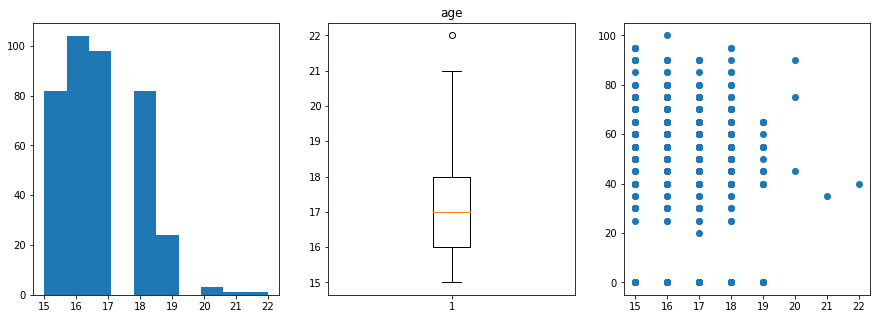

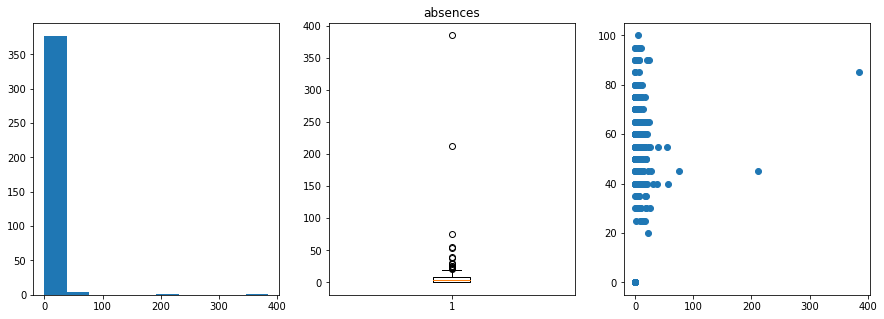

In [23]:
for col in num_list:
    graph_num(col)

#### Очищаю данные от выбросов

In [24]:
# absences
# Межквартильный размах
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
# Квартили
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)

print(
    # Границы вобросов по формуле
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов: [-12.0, 20.0].


In [25]:
# age
# Межквартильный размах
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
# Квартили
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)

print(
    # Границы вобросов по формуле
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов: [13.0, 21.0].


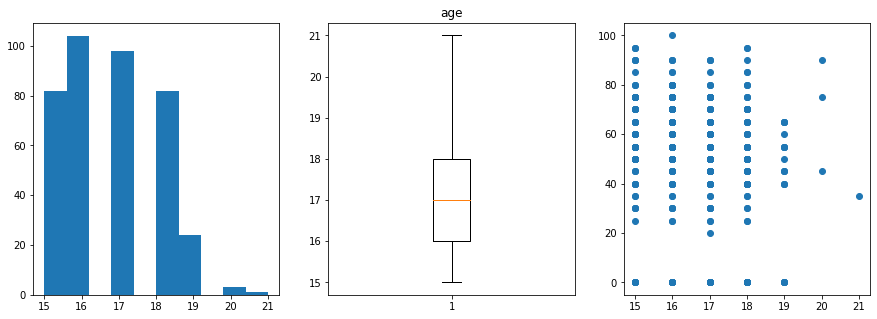

In [26]:
# age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df.query('13<=age<=21')['age'])
axes[1].boxplot(df.query('13<=age<=21')['age'].dropna())
axes[1].set_title('age')
axes[2].scatter(x=df.query('13<=age<=21')['age'],
                y=df.query('13<=age<=21')['score'], marker='o')

- age - возраст не имеет прямой зависимости к результату

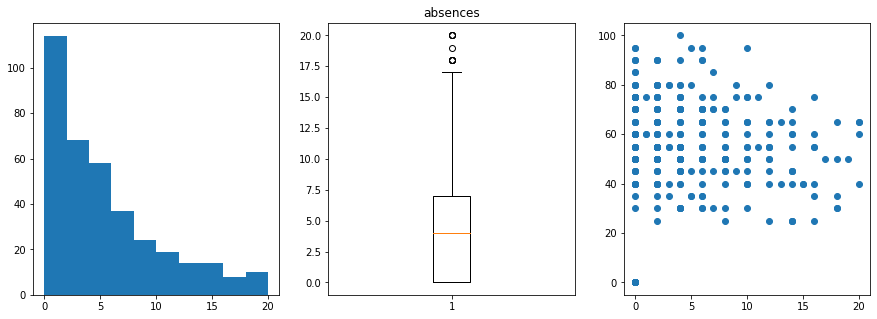

In [27]:
# absences
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df.query('-12<=absences<=20')['absences'])
axes[1].boxplot(df.query('-12<=absences<=20')['absences'].dropna())
axes[1].set_title('absences')
axes[2].scatter(x=df.query('-12<=absences<=20')['absences'],
                y=df.query('-12<=absences<=20')['score'], marker='o')

- absences - чем больше пропущенных занятий, тем ниже результат

### t-критерий Стьюдента

In [28]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [29]:
for col in df.columns[:-1]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


## Выводы
- studytime - чем больше уделяется времени на учебу помимо школы, тем выше результат
- higher - кто хочет получить высшее образование, имеют более высокий результат
- health - ученики с очень плохим состоянием здоровья учатся лучше. Возможно, они сильно перенапрягаются
- medu, fedu - чем выше образование родителей, тем выше балл
- failures - внеучебные неудачи негативно влияют на результат
- absences - чем больше пропущенных занятий, тем ниже результат

## Гипотезы
- sex - в среднем, девочки учатся лучше мальчиков
- address - городские ученики имеют более высокий балл
- mjob, fjob - ученики, где мама - работник здравоохранения или отец - учитель, имеют более высокие баллы
- reason - выбор школы по образовательной программе не гарантирует высокий результат
- guardian - если опекуном является не мать или отец, то результат ниже
- schoolsup - если оказывается дополнительная образовательная поддержка, результат ниже (поддержка нужна отстающим ученикам)
- internet - наличие интернета дома позитивно влияет на результат
- romantic - отношения могут влиять как позитивно, так и негативно
- freetime - наблюдается высокий результат у загруженных (но не перегруженных) после школы и у малозагруженных после школы
- goout - умеренное проведение времени с друзьями позитивно влияет на результат
- traveltime - чем дольше добираться до школы, тем ниже результат
- famrel - чем лучше семейные отношения, тем выше результат (в среднем)

## Подготавливаю dataframe для обучения

In [30]:
# Использую только значимые признаки
df = df[['sex', 'address', 'mjob', 'fjob', 'reason', 'guardian', 'studytime', 'schoolsup', 'higher', 'internet',
         'romantic', 'freetime', 'goout', 'health', 'medu', 'fedu', 'traveltime', 'failures', 'famrel', 'absences', 'score']]

In [31]:
# Удаляю пропуски
df = df.dropna()

In [32]:
# Чистые даннные
df

,sex,address,mjob,fjob,reason,guardian,studytime,schoolsup,higher,internet,romantic,freetime,goout,health,medu,fedu,traveltime,failures,famrel,absences,score
1,F,U,at_home,other,course,father,2.0,no,yes,yes,no,3.0,3.0,3.0,1.0,1.0,1.0,0.0,4.0,4.0,30.0
4,F,U,other,other,home,father,2.0,no,yes,no,no,3.0,2.0,5.0,3.0,3.0,1.0,0.0,3.0,4.0,50.0
5,M,U,services,other,reputation,mother,2.0,no,yes,yes,no,4.0,2.0,5.0,4.0,3.0,1.0,0.0,4.0,10.0,75.0
7,F,U,other,teacher,home,mother,2.0,yes,yes,no,no,1.0,4.0,1.0,4.0,4.0,2.0,0.0,3.0,6.0,30.0
9,M,U,other,other,home,mother,2.0,no,yes,yes,no,5.0,1.0,5.0,3.0,4.0,1.0,0.0,4.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,F,R,teacher,at_home,reputation,mother,1.0,no,yes,yes,yes,4.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,7.0,30.0
387,F,R,services,other,course,mother,3.0,no,yes,yes,no,4.0,2.0,5.0,2.0,3.0,1.0,1.0,4.0,0.0,0.0
388,F,U,teacher,services,course,mother,2.0,no,yes,yes,no,3.0,4.0,1.0,3.0,1.0,1.0,0.0,3.0,0.0,40.0
391,M,U,services,services,course,mother,1.0,no,yes,yes,no,4.0,5.0,2.0,3.0,1.0,2.0,0.0,1.0,3.0,80.0
